In [8]:
import pandas as pd
data = pd.read_csv('/content/UCBbandits.csv')
data

,B1,B2,B3,B4,B5
0,0,0,0,0,1
1,1,1,1,1,1
2,1,1,1,0,1
3,1,0,1,1,0
4,1,0,0,1,0
...,...,...,...,...,...
195,0,0,1,1,0
196,0,0,1,0,1
197,1,0,0,1,0
198,0,1,0,1,0


In [22]:
import math
import matplotlib.pyplot as plt

In [29]:
observations = 200
machines = 5
numbers_of_selections_of_each_machine = [0] * machines
sums_of_rewards_for_each_machine = [0] * machines

In [30]:
machines_selected = []
total_rewards = 0

In [31]:
for n in range(observations):
  bandit = 0
  max_upper_bound = 0

  for i in range(machines):

    if (numbers_of_selections_of_each_machine[i] > 0):
      average_reward = sums_of_rewards_for_each_machine[i] / numbers_of_selections_of_each_machine[i]
      di = math.sqrt(2 * math.log(n + 1) / numbers_of_selections_of_each_machine[i])
      upper_bound = average_reward + di

    else:
      upper_bound = 1e400

    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      bandit = i

  machines_selected.append(bandit)
  numbers_of_selections_of_each_machine[bandit] = numbers_of_selections_of_each_machine[bandit] + 1
  reward = data.values[n, bandit]
  sums_of_rewards_for_each_machine[bandit] = sums_of_rewards_for_each_machine[bandit] + reward
  total_rewards = total_rewards + reward

In [32]:
print("\n\nRewards By Machine = ", sums_of_rewards_for_each_machine)
print("\nTotal Rewards by UCB = ", total_rewards)
print("\nMachine Selected At Each Round By UCB : \n", machines_selected)



Rewards By Machine =  [16, 19, 18, 12, 31]

Total Rewards by UCB =  96

Machine Selected At Each Round By UCB : 
 [0, 1, 2, 3, 4, 1, 2, 3, 1, 3, 1, 0, 4, 1, 0, 2, 4, 3, 1, 0, 2, 4, 0, 3, 0, 1, 3, 0, 3, 1, 2, 2, 4, 1, 1, 1, 1, 0, 0, 3, 3, 1, 2, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 0, 3, 2, 1, 1, 4, 4, 4, 0, 3, 1, 4, 4, 2, 2, 2, 2, 2, 2, 4, 1, 1, 0, 3, 2, 1, 4, 0, 3, 3, 1, 4, 2, 2, 2, 3, 3, 2, 2, 2, 2, 1, 1, 4, 0, 2, 2, 3, 3, 3, 1, 2, 4, 4, 3, 3, 0, 0, 0, 0, 0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 2, 2, 4, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 4, 4, 1, 1, 2, 4, 3, 0, 1, 1, 1, 1, 1, 1, 4, 4, 2, 0, 4, 3, 3, 3, 1, 3, 2, 2, 2, 4, 4, 2, 2, 2, 1, 0, 0, 2, 4, 4, 4, 3, 4, 4, 0, 0, 1, 4, 2, 0]


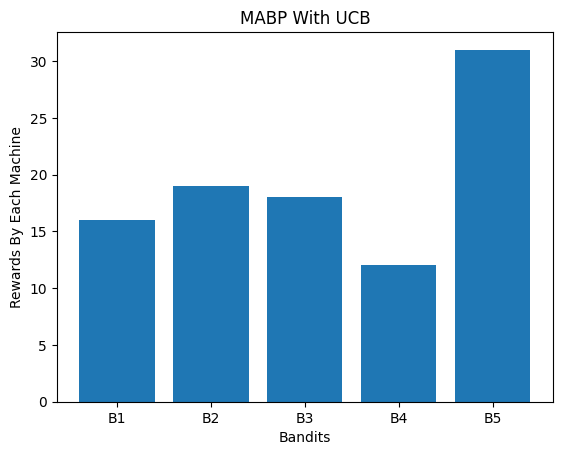

In [33]:
plt.bar(['B1','B2','B3','B4','B5'],sums_of_rewards_for_each_machine)
plt.title('MABP With UCB')
plt.xlabel('Bandits')
plt.ylabel('Rewards By Each Machine')
plt.show()